# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [52]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

In [15]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [53]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [54]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [55]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [56]:
#Code Used:
reps_north = north_df.groupby('Rep ID')

print(reps_north.groups)

{'Amanda': [11, 24, 25, 34, 47, 89, 92, 94, 95, 100, 105, 107, 122, 132, 137, 145, 148, 169, 172, 180, 187, 209, 242], 'Andy': [17, 22, 28, 43, 46, 48, 53, 69, 75, 76, 88, 99, 110, 120, 136, 160, 163, 171, 175, 185, 188, 191, 231], 'Brent': [0, 3, 4, 14, 16, 23, 65, 72, 90, 98, 103, 106, 111, 112, 113, 116, 119, 128, 131, 133, 134, 140, 146, 155, 167, 181, 190, 192, 196, 199, 210, 213, 216, 227, 238, 239, 240], 'Cam': [1, 9, 29, 31, 32, 36, 44, 56, 64, 78, 81, 82, 109, 154, 159, 164, 174, 183, 184, 193, 208, 212, 220, 243], 'Duke': [5, 8, 13, 15, 18, 21, 35, 38, 42, 51, 54, 60, 70, 77, 83, 85, 102, 126, 127, 149, 161, 176, 189, 195, 197, 211, 218, 236, 237], 'Joe': [6, 10, 37, 49, 50, 55, 61, 66, 73, 79, 96, 114, 118, 124, 125, 143, 150, 156, 177, 200, 201, 202, 204, 219, 222, 241], 'Lilly': [7, 19, 20, 26, 33, 39, 40, 41, 58, 62, 71, 80, 86, 87, 108, 117, 139, 144, 147, 153, 157, 162, 165, 168, 178, 198, 203, 214, 221, 232], 'Todd': [2, 12, 45, 67, 68, 74, 91, 93, 97, 104, 123, 129, 1

In [ ]:
# There are 9 Reps in North.

#### EDA Question 1B:  How many reps are in the South branch?  

In [57]:
#Code Used:
reps_south = south_df.groupby('Rep ID')

print(reps_south.groups)

{'Alice': [3, 13, 35, 60, 64, 122, 145, 148, 156, 208, 209, 237, 242, 270, 271, 277, 285, 292, 295, 305], 'Eric': [1, 17, 21, 24, 30, 32, 33, 36, 41, 42, 51, 53, 55, 66, 79, 82, 102, 113, 143, 155, 164, 167, 189, 195, 203, 268, 280, 284, 293, 296, 299, 302, 303, 308, 312], 'George': [9, 12, 31, 39, 49, 63, 75, 92, 99, 101, 106, 120, 125, 139, 151, 190, 191, 194, 198, 207, 214, 224, 231, 256, 290, 297, 300, 304, 313], 'Helga': [10, 45, 47, 48, 65, 67, 80, 83, 91, 108, 118, 136, 138, 159, 181, 196, 197, 199, 201, 202, 218, 220, 235, 241, 248, 261, 267, 282, 286, 298, 309], 'Josh': [11, 16, 88, 90, 95, 96, 97, 103, 107, 130, 131, 134, 146, 157, 160, 162, 165, 169, 176, 187, 206, 211, 247, 279, 291, 306], 'Karl': [5, 19, 43, 61, 70, 72, 87, 104, 114, 128, 140, 147, 149, 152, 154, 163, 183, 210, 230, 234, 236, 240, 244, 245, 252, 273, 276, 301], 'Kate': [0, 23, 38, 52, 57, 58, 89, 105, 112, 119, 123, 141, 150, 153, 174, 178, 184, 193, 200, 204, 212, 222, 238, 246, 249, 250, 274, 283, 288], 

In [58]:
# There are 11 reps in South.

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [59]:
#Code Used:
# Easier to run for all columns

print(north_df.describe().loc['mean'])

Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
Name: mean, dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [60]:
#Code Used:
print(south_df.describe().loc['mean'])

Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
Name: mean, dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [129]:
# Code Used:
north_calls = north_df['Time Block'].value_counts()
south_calls = south_df['Time Block'].value_counts()
print(north_calls + south_calls)
    

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 

In [130]:
# Code Used
# Add Additional Cells as needed.
# Separate the Numeric and Non-Numeric columns for North and South call centers

north_numeric_cols = north_df.select_dtypes(include=['number']).columns
print(north_numeric_cols)

north_non_numeric_cols = north_df.select_dtypes(exclude=['number']).columns
print(north_non_numeric_cols)

south_numeric_cols = south_df.select_dtypes(include=['number']).columns
print(south_numeric_cols)

south_non_numeric_cols = south_df.select_dtypes(exclude=['number']).columns
print(south_non_numeric_cols)

Index(['Unnamed: 0', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')
Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale'],
      dtype='object')
Index(['Unnamed: 0', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')
Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale'],
      dtype='object')


In [131]:
# Searching for missing data for North Non-Numeric Data
north_df[north_non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Branch                245 non-null    object
 1   Call Purpose          245 non-null    object
 2   Time Block            245 non-null    object
 3   Incoming or Outgoing  245 non-null    object
 4   Queue                 245 non-null    object
 5   Rep ID                245 non-null    object
 6   Sale                  245 non-null    object
dtypes: object(7)
memory usage: 13.5+ KB


In [132]:
# Searching for missing data for South Non-Numeric Data
south_df[south_non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Branch                314 non-null    object
 1   Call Purpose          314 non-null    object
 2   Time Block            314 non-null    object
 3   Incoming or Outgoing  314 non-null    object
 4   Queue                 314 non-null    object
 5   Rep ID                314 non-null    object
 6   Sale                  314 non-null    object
dtypes: object(7)
memory usage: 17.3+ KB


In [133]:
# Searching for missing data for North Numeric Data - Appears the Incoming Wait time may have missing Data.
north_df[north_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Lost Call              245 non-null    int64  
 2   Abandoned              245 non-null    int64  
 3   Busy Minutes           245 non-null    int64  
 4   Not Ready Minutes      245 non-null    int64  
 5   Incoming Wait Time     82 non-null     float64
 6   During Call Wait Time  245 non-null    int64  
 7   Calls                  245 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 15.4 KB


In [134]:
# Searching for missing data for South Numeric Data - Incoming Wait Time appears to have missing data here, too.
south_df[south_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Lost Call              314 non-null    int64  
 2   Abandoned              314 non-null    int64  
 3   Busy Minutes           314 non-null    int64  
 4   Not Ready Minutes      314 non-null    int64  
 5   Incoming Wait Time     126 non-null    float64
 6   During Call Wait Time  314 non-null    int64  
 7   Calls                  314 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 19.8 KB


In [137]:
#checking for any/all n/a values on entire North dataframe of 15 columns - confirms the Incoming Wait Time column
num_missing = north_df.isna().sum()
num_missing[:15]

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [138]:
#checking for any/all n/a values on entire North dataframe of 15 columns - confirms the Incoming Wait Time column again.
num_missing = south_df.isna().sum()
num_missing[:15]

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

<Axes: >

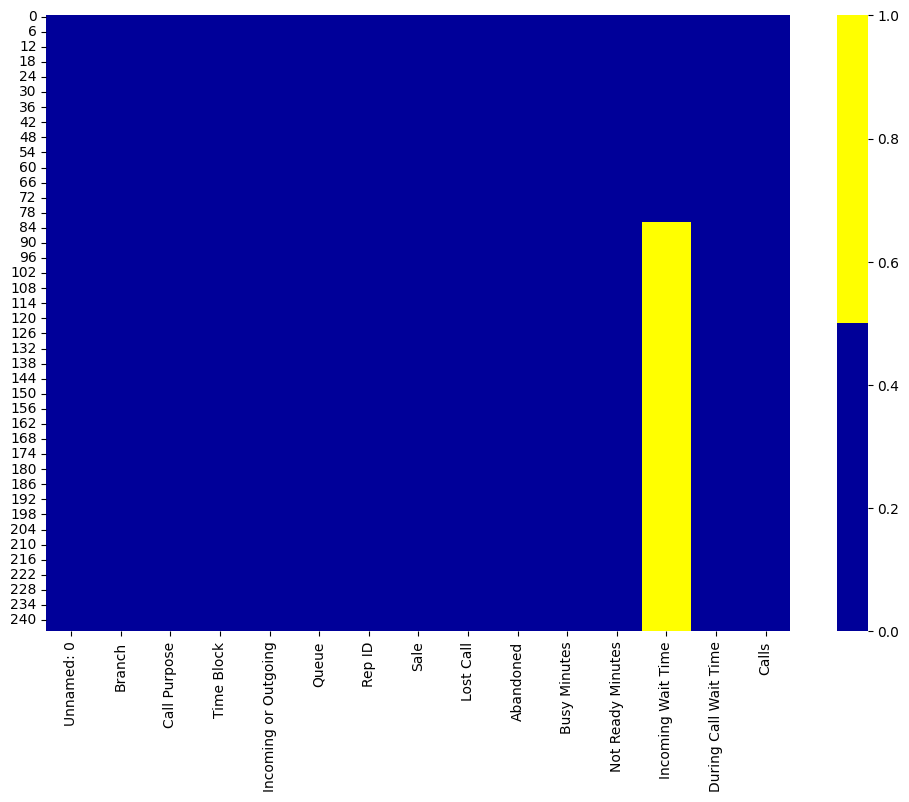

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

cols = north_df.columns[:15]
colours = ['#000099', '#ffff00'] # colours: yellow - missing. blue - not missing
sns.heatmap(north_df[cols].isna(), cmap=sns.color_palette(colours))


<Axes: >

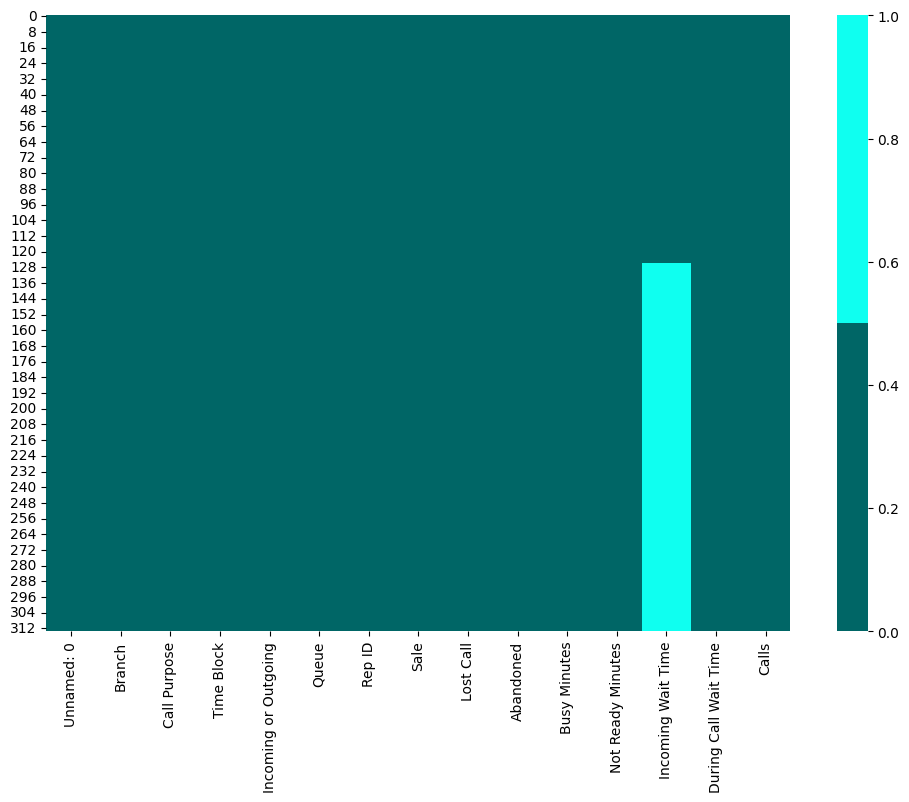

In [141]:
plt.figure(figsize=(12,8))

cols = south_df.columns[:15]
colours = ['#006666', '#0ffff0'] # colours: mint - missing. forest - not missing
sns.heatmap(south_df[cols].isna(), cmap=sns.color_palette(colours))

In [142]:
#Since this is a call center, and the data is Agent specific- opted to fill in the 'missing data' with 'Data_Missing'. Even missing data is valuable in this case.
north_df_copy = north_df.copy()
north_df_copy[north_numeric_cols] = north_df_copy[north_numeric_cols].fillna(-999)
north_df_copy[north_non_numeric_cols] = north_df_copy[north_non_numeric_cols].fillna('Data_Missing')

south_df_copy = south_df.copy()
south_df_copy[south_numeric_cols] = south_df_copy[south_numeric_cols].fillna(-999)
south_df_copy[south_non_numeric_cols] = south_df_copy[south_non_numeric_cols].fillna('Data_Missing')

In [148]:
#Check for outliers in the Incoming Wait Time column with .describe for North
north_df['Incoming Wait Time'].describe()

count    82.000000
mean      3.048780
std       1.456382
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Incoming Wait Time, dtype: float64

In [150]:
#Check for outliers in the Incoming Wait Time column with .describe for South
south_df['Incoming Wait Time'].describe()

count    126.000000
mean       3.000000
std        1.308434
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Incoming Wait Time, dtype: float64

In [152]:
#Check for Duplicated data - North - Ran as north_df_copy and north_df - both did not yield duplicates
north_df[north_df.duplicated()]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [154]:
#Check for Duplicated data - South - Ran as south_df_copy and south_df - both did not yield duplicates.
south_df[south_df.duplicated()]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I do not see two separate YES values, but visually scanned the CSV file - found one entry with trailing space.

In [156]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'].str.strip()

print(north_df)

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
240         240  North  Product Support    5:00 PM             Outgoing     B   
241         241  North  Product Support    5:00 PM             Outgoing     A   
242         242  North  Product Support    5:00 PM             Outgoing     A   
243         243  North  Product Support    5:00 PM             Outgoing     A   
244         244  North  Product Support    5:00 PM             Outgoing     B   

     Rep ID Sale  Lost Call

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are not duplicates that I see.

In [292]:
#Code Used
# Add Additional Cells as needed.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Tried repeatedly to drop Unnamed because it has no real function - but it will not drop the columns despite my best efforts.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [173]:
# Create dataframe for the entire company named df
# Since it looks like we will still be separating data from North and South - setting this up as frames/ keys:
frames = [north_df, south_df]
df_keys = pd.concat(frames, keys=['N', 'S'])

df_keys

Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing  \
N 0             0  North        Complaint    9:00 AM             Incoming   
  1             1  North    Sales Support   11:00 AM             Incoming   
  2             2  North    Sales Support   11:00 AM             Incoming   
  3             3  North    Sales Support    4:00 PM             Incoming   
  4             4  North  Product Support   12:00 PM             Incoming   
...           ...    ...              ...        ...                  ...   
S 309         309  South  Product Support    5:00 PM             Outgoing   
  310         310  South  Product Support    5:00 PM             Outgoing   
  311         311  South  Product Support    5:00 PM             Outgoing   
  312         312  South  Product Support    5:00 PM             Outgoing   
  313         313  South  Product Support    5:00 PM             Outgoing   

      Queue  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  \
N 0       B   Brent   NO          0          1             9   
  1       A     Cam   NO          0          0            11   
  2       B    Todd   NO          0          0             9   
  3       B   Brent   NO          0          0            11   
  4       B   Brent   NO          0          0             8   
...     ...     ...  ...        ...        ...           ...   
S 309     D   Helga   NO          0          0            10   
  310     C   Susan   NO          0          0            12   
  311     C   Sandy   NO          0          0             9   
  312     C    Eric   NO          0          0            10   
  313     D  George   NO          0          0            10   

       Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls  
N 0                    2                 1.0                      4      1  
  1                    1                 1.0                      3      1  
  2                    3                 1.0                      3      1  
  3                    2                 1.0                      4      1  
  4                    2                 1.0                      4      1  
...                  ...                 ...                    ...    ...  
S 309                  3                 NaN                      4      1  
  310                  3                 NaN                      4      1  
  311                  3                 NaN                      4      1  
  312                  1                 NaN                      2      1  
  313                  2                 NaN                      3      1  

[559 rows x 15 columns]

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls: Brent 37
- North Branch = 245
- South Branch = 314


In [174]:
# Code Used
# Add Additional Cells as needed.
rep_totals = df_keys.groupby('Rep ID').sum().sort_values('Calls')

print(rep_totals)

        Unnamed: 0  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Rep ID                                                                      
Alice         3637          0          0           199                 46   
Amanda        2666          0          1           229                 43   
Andy          2494          0          3           228                 43   
Cam           2746          1          0           233                 46   
Xander        3340          1          0           244                 44   
Sharon        4226          1          1           257                 38   
Josh          3960          3          0           260                 50   
Susan         4006          2          0           267                 53   
Joe           3178          0          0           256                 49   
Karl          4532          1          0           287                 61   
Duke          2999          2          0           292                 56   

C:\Users\angel\AppData\Local\Temp\ipykernel_22292\3760881954.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rep_totals = df_keys.groupby('Rep ID').sum().sort_values('Calls')


In [175]:
rep_totals_north = north_df.groupby('Rep ID').sum().sort_values('Calls')

print(rep_totals_north)

        Unnamed: 0  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Rep ID                                                                      
Amanda        2666          0          1           229                 43   
Andy          2494          0          3           228                 43   
Cam           2746          1          0           233                 46   
Xander        3340          1          0           244                 44   
Joe           3178          0          0           256                 49   
Duke          2999          2          0           292                 56   
Todd          4252          1          0           296                 58   
Lilly         3375          0          2           307                 59   
Brent         4840          0          1           362                 71   

        Incoming Wait Time  During Call Wait Time  Calls  
Rep ID                                                    
Amanda                12.0        

C:\Users\angel\AppData\Local\Temp\ipykernel_22292\855984804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rep_totals_north = north_df.groupby('Rep ID').sum().sort_values('Calls')


In [186]:
north_totals = north_df['Calls'].sum()

print(north_totals)

245


In [187]:
south_totals = south_df['Calls'].sum()

print(south_totals)

314


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 0.03
- South Branch = 0.01
- Company Wide = 0.04
- Do any of these fall out of the optimal range of 2-5%?  Not yet, but some days likely DO fall past 5%.

In [192]:
# Code Used
# Add Additional Cells as needed.
north_abandon = north_df.loc[:, 'Abandoned'].mean()
print(north_abandon)

0.02857142857142857


In [193]:
south_abandon = south_df.loc[:, 'Abandoned'].mean()
print(south_abandon)

0.012738853503184714


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 16 calls, or about 20%
- South Branch = 28 calls, or about 22%
- Company Wide = 44 calls, or about 21%

In [224]:
# Code Used
# Add Additional Cells as needed.

inbound_wait_north_counts = north_df.value_counts('Incoming Wait Time')
print(inbound_wait_north_counts)

inbound_wait_north_percs = north_df.value_counts('Incoming Wait Time', normalize=True)
print(inbound_wait_north_percs)

pd.concat([inbound_wait_north_counts, inbound_wait_north_percs], axis=1, keys=['Ncounts', 'Npercentage'])

Incoming Wait Time
4.0    20
1.0    17
5.0    17
2.0    16
3.0    12
dtype: int64
Incoming Wait Time
4.0    0.243902
1.0    0.207317
5.0    0.207317
2.0    0.195122
3.0    0.146341
dtype: float64


,Ncounts,Npercentage
Incoming Wait Time,,
4.0,20,0.243902
1.0,17,0.207317
5.0,17,0.207317
2.0,16,0.195122
3.0,12,0.146341


In [225]:
#Now for South - also looking for the 2 second Inbound wait time...
inbound_wait_south_counts = south_df.value_counts('Incoming Wait Time')
print(inbound_wait_south_counts)

inbound_wait_south_percs = south_df.value_counts('Incoming Wait Time', normalize=True)
print(inbound_wait_south_percs)

pd.concat([inbound_wait_south_counts, inbound_wait_south_percs], axis=1, keys=['Scounts', 'Spercentage'])

Incoming Wait Time
4.0    30
3.0    29
2.0    28
1.0    20
5.0    19
dtype: int64
Incoming Wait Time
4.0    0.238095
3.0    0.230159
2.0    0.222222
1.0    0.158730
5.0    0.150794
dtype: float64


,Scounts,Spercentage
Incoming Wait Time,,
4.0,30,0.238095
3.0,29,0.230159
2.0,28,0.222222
1.0,20,0.158730
5.0,19,0.150794


In [227]:
inbound_wait_company_counts = df_keys.value_counts('Incoming Wait Time')
print(inbound_wait_company_counts)

inbound_wait_company_percs = df_keys.value_counts('Incoming Wait Time', normalize=True)
print(inbound_wait_company_percs)

pd.concat([inbound_wait_company_counts, inbound_wait_company_percs], axis=1, keys=['CO_counts', 'CO_percentage'])

Incoming Wait Time
4.0    50
2.0    44
3.0    41
1.0    37
5.0    36
dtype: int64
Incoming Wait Time
4.0    0.240385
2.0    0.211538
3.0    0.197115
1.0    0.177885
5.0    0.173077
dtype: float64


,CO_counts,CO_percentage
Incoming Wait Time,,
4.0,50,0.240385
2.0,44,0.211538
3.0,41,0.197115
1.0,37,0.177885
5.0,36,0.173077


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.01


In [249]:
# Code Used 
north_df['Incoming Wait Time'].describe()


count    82.000000
mean      3.048780
std       1.456382
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Incoming Wait Time, dtype: float64

In [250]:
south_df['Incoming Wait Time'].describe()

count    126.000000
mean       3.000000
std        1.308434
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Incoming Wait Time, dtype: float64

In [251]:
df_keys['Incoming Wait Time'].describe()

count    208.000000
mean       3.019231
std        1.365417
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Incoming Wait Time, dtype: float64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I like fivethirtyeight. Homework is stressful enough - the colors give me joy. Bar charts are nice to visualize comparisons, as we are doing per queues.

C:\Users\angel\AppData\Local\Temp\ipykernel_22292\3896850447.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df_keys.groupby("Queue").agg("sum")


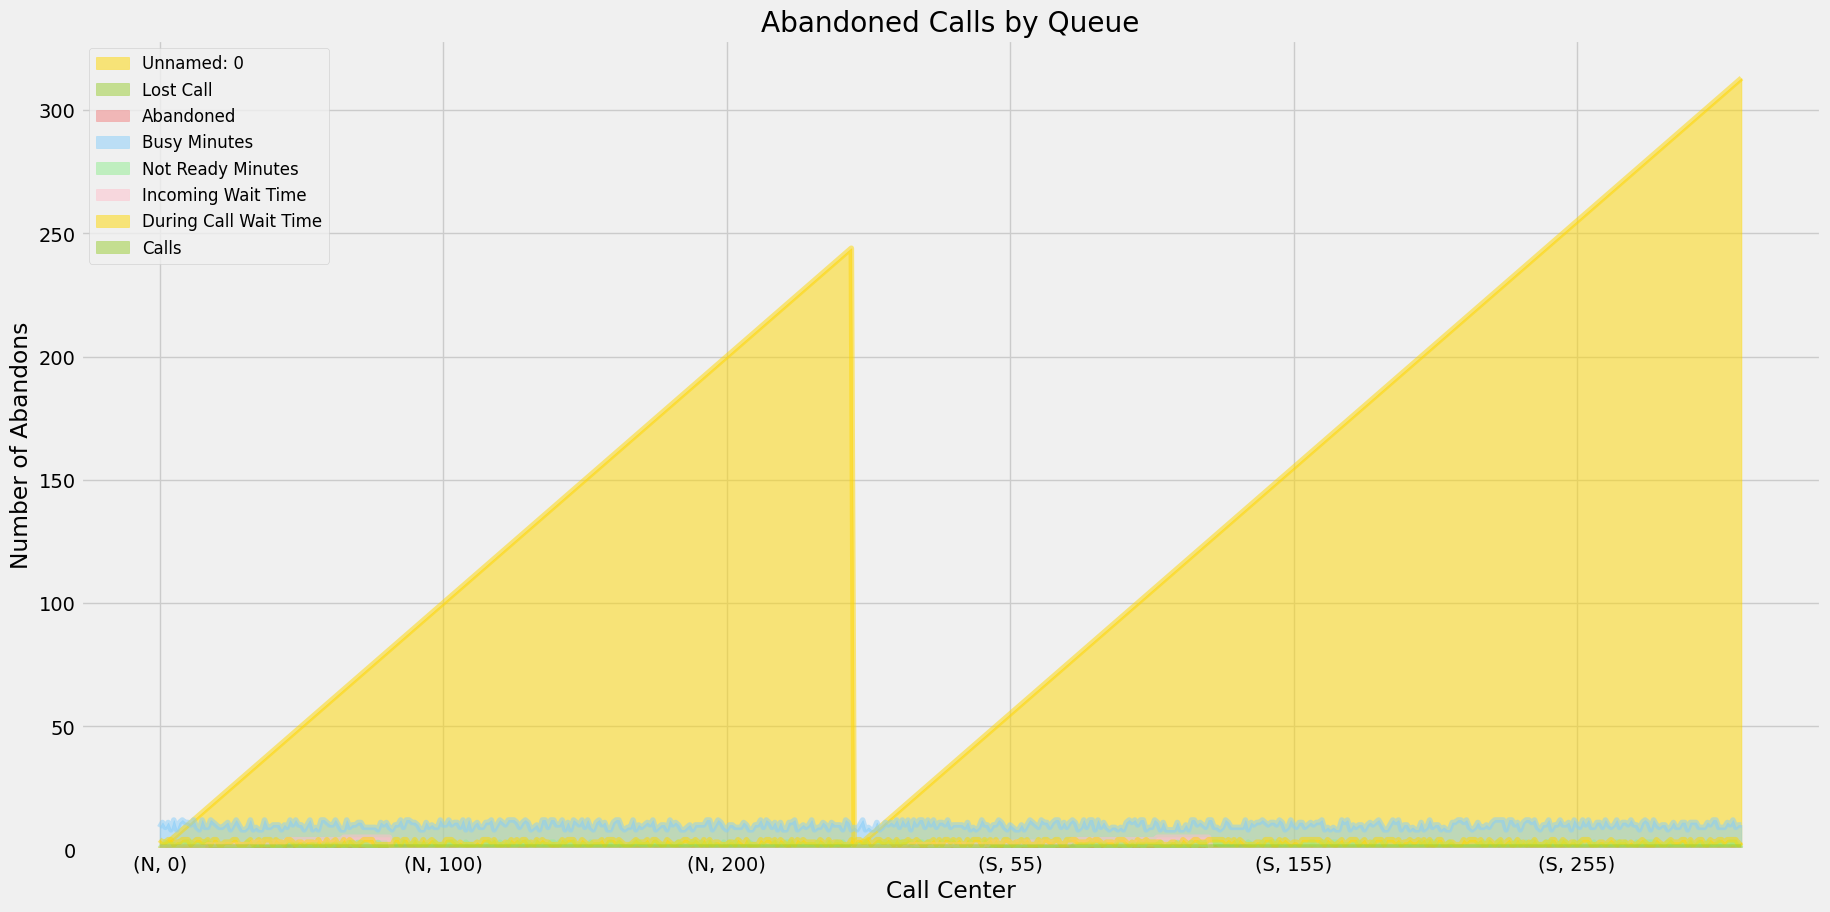

In [293]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20,10)


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df_keys.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
df_keys.plot(kind = 'area', stacked = False, color = colors)
plt.title('Abandoned Calls by Queue',color = 'black')
plt.xlabel('Call Center',color = 'black')
plt.ylabel('Number of Abandons',color = 'black')
plt.legend(fontsize = 12)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_unstacked.png')

plt.show()



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: Horizonal Multi-Bar Chart to have the side by side comparisons.

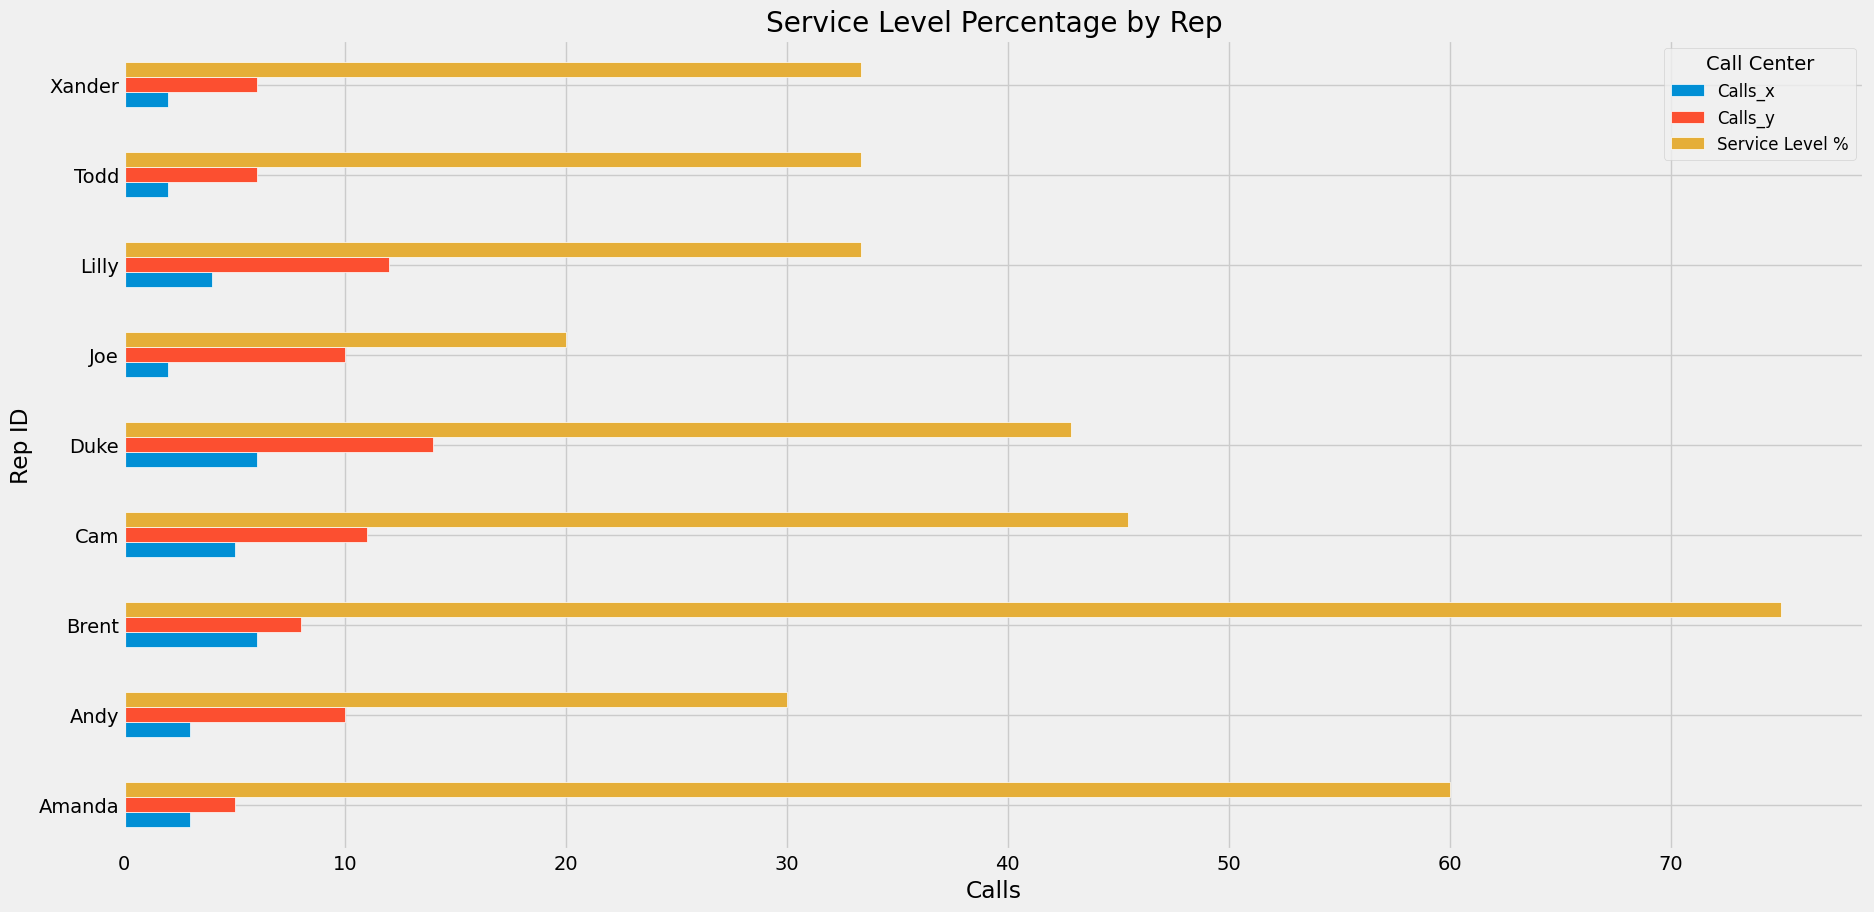

In [302]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level.plot.barh(edgecolor = 'white')
plt.title('Service Level Percentage by Rep', color = 'black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.xlabel('Calls', color="black")
plt.ylabel('Rep ID', color='black')
plt.legend(title="Call Center", fontsize = 12)
plt.savefig('grouped_bar_SvcLvl.png')

plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: Wanted a pie or donut to show how all of the calls - Inbound and Outbound - fit into the overall scheme of efficiency.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


ValueError: could not convert string to float: 'Complaint'

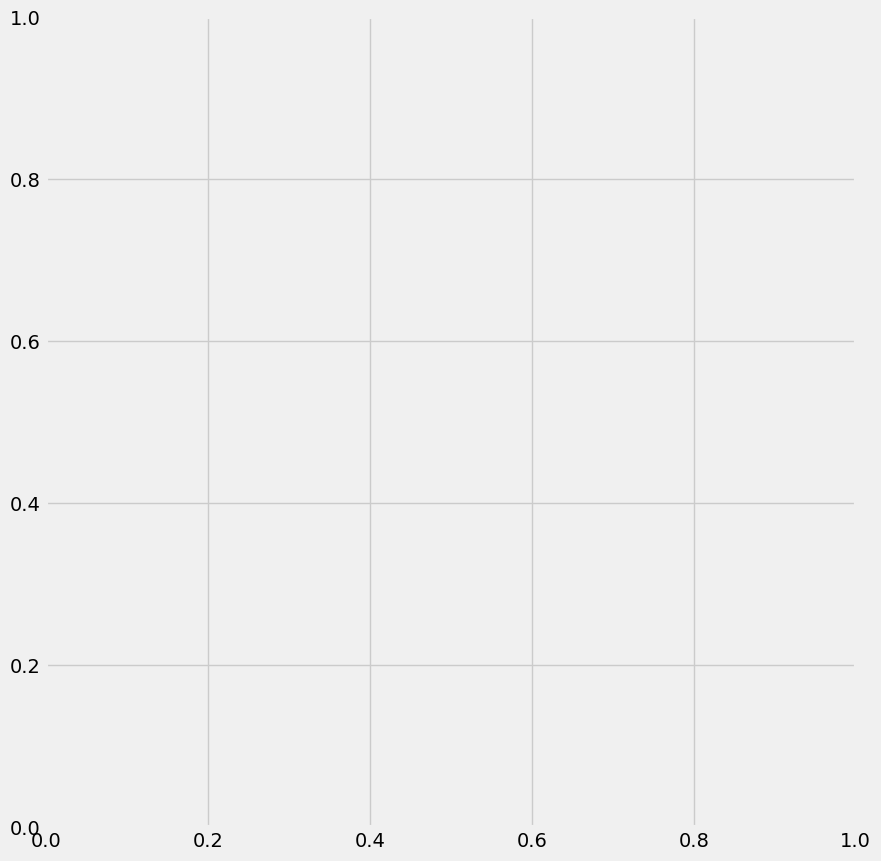

In [321]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df_keys.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
plt.pie(purpose_group['Call Purpose'], autopct = '%1.1f%%', shadow = True, explode = [0.1,0,0,0,0], colors = colors, startangle = 90)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(purpose_counts.index, fontsize = 12, loc = 'upper left')
plt.title('Inbound /Outbound by Call Purpose', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut.png')

plt.show()



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: South Center is working slightly faster than North Center - both were about 3 seconds to answer lines, but North had a few areas where they were a few hundredths slower on Inbound calls than South. (North had 245 vs. 314 for South) If either facility had a person on leave, or a new hire just learning - it would have a negative impact to overall service levels.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: North could use someone to help with Inbound calls.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Prompt Time, and Distress Callers (if applicable). This could lead to the abandonment, and higher call-back volume.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: